In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

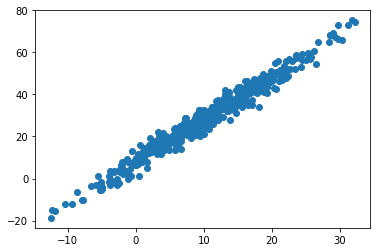

In [167]:
x = np.random.normal(10, 8, 500)
y = 3 + 2*x + np.random.normal(5, 3, 500)
plt.plot(x, y, 'o')

    training --> 0.7 or 70% or 80%
    testing --> 0.3 or 30% or 20%
    
    
    
    Pens    Pay  Pay_per_pen (feature adding)
    10      100     10

In [170]:
def train_test_split(feature, target, test_ratio=0.3):
    """This Function will split the data into training and test
    Return X_train, X_test, Y_train, Y_test"""
    if len(feature) == len(target):
        X_train = []
        Y_train = []
        X_test = []
        Y_test = []
        train_ratio = 1 - test_ratio
        train_size = int(len(feature)*train_ratio)
        test_size = int(len(feature)*test_ratio)
        X_train.extend(feature[:train_size])
        Y_train.extend(target[:train_size])
        X_test.extend(feature[train_size:])
        Y_test.extend(target[train_size:])
        return np.array(X_train), np.array(X_test), np.array(Y_train), np.array(Y_test)
    else:
        return "Length Mismatch --> Length of feature and target is not same..."

In [4]:
100*0.3

30.0

In [5]:
500*0.7

350.0

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [8]:
x[:350]

array([ 7.981598  ,  2.79566953,  4.57803104,  4.64668104, -3.33949002,
       13.15756834,  7.71707826,  7.64866898,  2.61777767,  3.48244162,
        9.44369658, 15.73677019, 16.84260321, -1.32813532, 14.7842899 ,
       21.18424115, 12.82122679, 24.92137624,  9.36110672,  7.27866575,
       12.84410203, 12.11492021, 11.28612267, 14.29509875,  1.37975955,
       17.3854345 , 33.02419274,  0.74866951, 19.89832388,  2.48978002,
        8.45049645, 23.43323369, 13.5777159 ,  4.72064849, 12.16146195,
        9.4751866 ,  3.39226151, 14.55833406,  8.44315681,  7.32187084,
       15.00831409,  2.29803028, 13.12034651,  2.14947805, 18.33742503,
       13.75669008, 18.09780074, 20.50266948, 11.09436785, 20.38432848,
       12.11820422, 13.11961717, 11.43671089, -5.66354525,  5.14921903,
       -1.77987449,  5.03567407, 25.19978029, 17.906907  , 12.90588489,
       11.11224825, 15.03480885, 17.1757133 ,  9.88386158, 18.05068132,
       10.169122  , 14.39922313, -3.70326381,  7.37162045, 25.65

In [95]:
class LinearRegression:
    def __init__(self):
        self._coef = None
        self._intercept = None
    
    def fit(self, feature, target):
        """This method will make our model learn and find the best values 
        of coeffiecient and intercept"""
        feature = np.array(feature)
        target = np.array(target)
        a = sum((feature - feature.mean()) * (target - target.mean()))
        b = sum((feature - feature.mean())**2)
        self._coef = a/b
        self._intercept = target.mean() - (self._coef*feature.mean())
        
    def predict(self, X_test):
        try:
            len(X_test)
        except:
            raise ValueError("Testing Data Should Be Iterable Object") 
        else:
            y_test = []
            for x in X_test:
                y_test.append(self._intercept + self._coef*x)
            return np.array(y_test)
        
    def mean_absolute_error(self, y, y_hat):
        return (abs((y - y_hat)).sum())/len(y)
    
    def mean_square_error(self, y, y_hat):
        return (((y - y_hat)**2).sum())/len(y)
    
    def rmse(self, y, y_hat):
        return np.sqrt((((y - y_hat)**2).sum())/len(y))

    def r2_score(self, y, y_hat):
        r2score = 1 - (sum((y - y_hat)**2) / sum((y - y.mean())**2))
        return r2score

In [96]:
model = LinearRegression()


In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [98]:
len(X_train)

70

In [99]:
len(X_test)

30

In [100]:
len(Y_train)

70

In [101]:
len(Y_test)

30

In [102]:
model.fit(X_train, Y_train)

In [103]:
model._coef

2.028606721114044

In [104]:
model._intercept

7.617880482164118

In [105]:
pred = model.predict(X_test)

In [106]:
Y_test[:5]

array([40.51668172, 32.63080974, 80.04695117, 19.76360697, 26.422128  ])

In [107]:
pred[:5]

array([38.59442475, 33.79530963, 76.51943917, 19.70181981, 26.13526251])

In [108]:
model.mean_absolute_error(Y_test, pred)

2.5828480033722423

In [109]:
model.r2_score(Y_test, pred)

0.9707131434626913

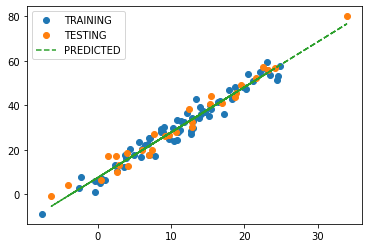

In [110]:
plt.plot(X_train, Y_train, 'o', label="TRAINING")
plt.plot(X_test, Y_test, 'o', label="TESTING")
plt.plot(X_test, pred, '--', label="PREDICTED")
plt.legend()

In [21]:
model = LinearRegression()
model.fit(x, y)

In [22]:
model._coef

1.9937078623346098

In [23]:
model._intercept

8.138984699414479

In [24]:
pred1 = model.predict(x)

In [25]:
model.mean_absolute_error(y, pred1)

2.9148861575644713

In [26]:
model.r2_score(y, pred1)

0.9557644331259598

In [88]:
def train_test_split(feature, target, test_ratio=0.3):
    """This Function will split the data into training and test
    Return X_train, X_test, Y_train, Y_test without sampling bias"""
    if len(feature) == len(target):
        X_train = []
        Y_train = []
        X_test = []
        Y_test = []
        train_ratio = 1 - test_ratio
        train_size = int(len(feature)*train_ratio)
        test_size = int(len(feature)*test_ratio)
        X_train.extend(feature[:train_size])
        Y_train.extend(target[:train_size])
        X_test.extend(feature[train_size:])
        Y_test.extend(feature[train_size:])
        return np.array(X_train), np.array(X_test), np.array(Y_train), np.array(Y_test)
    else:
        return "Length Mismatch --> Length of feature and target is not same..."

In [30]:
l = list(range(0, 100))
np.random.shuffle(l)

In [31]:
l

[35,
 20,
 1,
 89,
 78,
 68,
 63,
 60,
 91,
 99,
 17,
 24,
 23,
 49,
 54,
 28,
 61,
 75,
 22,
 59,
 2,
 88,
 71,
 5,
 52,
 93,
 48,
 69,
 36,
 77,
 26,
 38,
 58,
 72,
 14,
 25,
 83,
 90,
 32,
 76,
 56,
 0,
 40,
 47,
 92,
 15,
 41,
 43,
 86,
 21,
 46,
 13,
 80,
 37,
 33,
 4,
 8,
 18,
 11,
 62,
 39,
 45,
 57,
 82,
 66,
 94,
 73,
 67,
 96,
 10,
 97,
 85,
 27,
 12,
 50,
 81,
 53,
 74,
 65,
 19,
 87,
 34,
 3,
 55,
 7,
 51,
 44,
 95,
 84,
 79,
 30,
 9,
 16,
 64,
 42,
 98,
 70,
 31,
 29,
 6]

In [33]:
np.random.permutation(range(100))

array([38,  8, 85, 31, 33, 23, 40,  0, 17, 99, 10, 64, 53, 78, 79, 91, 47,
       15, 28, 82, 84,  3, 32, 56, 16, 42, 83, 14, 71, 48, 21, 59,  4, 60,
       96, 98, 63, 90, 46, 27, 57, 13, 87, 18,  2, 50, 76, 75,  9, 81,  7,
       34, 30, 77, 26,  5, 45, 58, 80, 74, 69,  1, 51, 54, 52, 62, 19, 12,
       65,  6, 36, 44, 41, 94, 73, 25, 22, 92, 29, 35, 95, 55, 89, 43, 97,
       67, 88, 61, 72, 24, 49, 11, 68, 37, 93, 86, 39, 20, 66, 70])

In [37]:
x[40]

8.209421685998162

In [36]:
x[[0, 1, 2, 40]]

array([13.62588647, -8.10958558,  5.15642508,  8.20942169])

In [43]:
pd.DataFrame(x)[[3, 4, 5, 40]]

KeyError: "None of [Int64Index([3, 4, 5, 40], dtype='int64')] are in the [columns]"

In [151]:
def train_test_split(feature, target, test_ratio=0.3):
    """This Function will split the data into training and test
    Return X_train, X_test, Y_train, Y_test without sampling bias"""
    if len(feature) == len(target):
        X_train = []
        Y_train = []
        X_test = []
        Y_test = []
        train_ratio = 1 - test_ratio
        train_size = int(len(feature)*train_ratio)
        test_size = int(len(feature)*test_ratio)
        indices = np.random.permutation(range(len(feature)))
        train_ind = indices[:train_size]
        test_ind = indices[train_size:]
        X_train.extend(feature[train_ind])
        Y_train.extend(target[train_ind])
        X_test.extend(feature[test_ind])
        Y_test.extend(target[test_ind])
        return np.array(X_train), np.array(X_test), np.array(Y_train), np.array(Y_test)
    else:
        return "Length Mismatch --> Length of feature and target is not same..."

In [152]:
model = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(x, y)

In [153]:
X_train[:5]

array([ 9.64037342,  3.48688024,  0.34245837, 13.95748672, 14.35980932])

In [154]:
Y_train[:5]

array([24.80427585, 12.3450618 ,  7.29500475, 39.08549894, 37.44758324])

In [155]:
model.fit(X_train, Y_train)

In [156]:
model._coef

2.0420324365521365

In [160]:
model._intercept

7.324898844467995

In [161]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

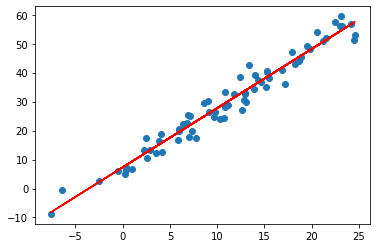

In [162]:
plt.plot(X_train, Y_train, 'o', label="TRAIN DATA")
plt.plot(X_train, train_pred, 'r', label="TRAIN PREDICT")
plt.show()

In [163]:
model.mean_absolute_error(Y_train, train_pred)

2.489915592430111

In [164]:
model.r2_score(Y_train, train_pred)

0.9616902796033764

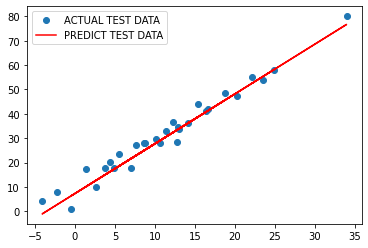

In [165]:
plt.plot(X_test, Y_test, 'o', label="ACTUAL TEST DATA")
plt.plot(X_test, test_pred, 'r', label="PREDICT TEST DATA")
plt.legend()
plt.show()

In [166]:
model.r2_score(Y_test, test_pred)

0.9602322830185565

In [171]:
def train_test_split_with_bias(feature, target, test_ratio=0.3):
    """This Function will split the data into training and test
    Return X_train, X_test, Y_train, Y_test"""
    if len(feature) == len(target):
        X_train = []
        Y_train = []
        X_test = []
        Y_test = []
        train_ratio = 1 - test_ratio
        train_size = int(len(feature)*train_ratio)
        test_size = int(len(feature)*test_ratio)
        X_train.extend(feature[:train_size])
        Y_train.extend(target[:train_size])
        X_test.extend(feature[train_size:])
        Y_test.extend(target[train_size:])
        return np.array(X_train), np.array(X_test), np.array(Y_train), np.array(Y_test)
    else:
        return "Length Mismatch --> Length of feature and target is not same..."

In [172]:
def train_test_split_without_bias(feature, target, test_ratio=0.3):
    """This Function will split the data into training and test
    Return X_train, X_test, Y_train, Y_test without sampling bias"""
    if len(feature) == len(target):
        X_train = []
        Y_train = []
        X_test = []
        Y_test = []
        train_ratio = 1 - test_ratio
        train_size = int(len(feature)*train_ratio)
        test_size = int(len(feature)*test_ratio)
        indices = np.random.permutation(range(len(feature)))
        train_ind = indices[:train_size]
        test_ind = indices[train_size:]
        X_train.extend(feature[train_ind])
        Y_train.extend(target[train_ind])
        X_test.extend(feature[test_ind])
        Y_test.extend(target[test_ind])
        return np.array(X_train), np.array(X_test), np.array(Y_train), np.array(Y_test)
    else:
        return "Length Mismatch --> Length of feature and target is not same..."

In [173]:
len(x)

500

In [174]:
len(y)

500

In [231]:
class MyLinearRegression:
    def __init__(self):
        self._coef = None
        self._intercept = None
    
    def fit(self, feature, target):
        """This method will make our model learn and find the best values 
        of coeffiecient and intercept"""
        feature = np.array(feature)
        target = np.array(target)
        a = sum((feature - feature.mean()) * (target - target.mean()))
        b = sum((feature - feature.mean())**2)
        self._coef = a/b
        self._intercept = target.mean() - (self._coef*feature.mean())
        
    def predict(self, X_test):
        try:
            len(X_test)
        except:
            raise ValueError("Testing Data Should Be Iterable Object") 
        else:
            y_test = []
            for x in X_test:
                y_test.append(self._intercept + self._coef*x)
            return np.array(y_test)
        
    def mean_absolute_error(self, y, y_hat):
        return (abs((y - y_hat)).sum())/len(y)
    
    def mean_square_error(self, y, y_hat):
        return (((y - y_hat)**2).sum())/len(y)
    
    def rmse(self, y, y_hat):
        return np.sqrt((((y - y_hat)**2).sum())/len(y))

    def r2_score(self, y, y_hat):
        r2score = 1 - (sum((y - y_hat)**2) / sum((y - y.mean())**2))
        return r2score

In [234]:
model1 = MyLinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split_with_bias(x, y)
model1.fit(X_train, Y_train)
pred1 = model1.predict(X_test)
acc1 = model1.r2_score(Y_test, pred1)
print("\n Accuracy of model with bias splitting : ", acc1)


model2 = MyLinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split_without_bias(x, y)
model2.fit(X_train, Y_train)
pred2 = model2.predict(X_test)
acc2 = model2.r2_score(Y_test, pred2)
print("\n Accuracy of model without bias splitting : ", acc2)




 Accuracy of model with bias splitting :  0.9597180203711035

 Accuracy of model without bias splitting :  0.9707191086648194


In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [178]:
lin_model = LinearRegression()
lin_model.fit(X_train.reshape(-1, 1), Y_train)
lin_pred = lin_model.predict(X_test.reshape(-1, 1))
r2_score(Y_test, lin_pred)

0.9653080980081906

In [225]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [226]:
x_train[:5]

array([ 8.80231998,  9.79833408, -1.33055684, 24.40718405, 18.16552516])

In [227]:
x_test[:5]

array([17.44657508, 17.39311529,  5.08222951, 18.39474498, 12.91285376])

In [228]:
y_train[:5]

array([30.0601727 , 26.79134048,  9.17304192, 56.40175882, 34.25757404])

In [229]:
y_test[:5]

array([47.17638277, 41.94951989, 19.06172818, 43.8477745 , 33.75289495])

In [235]:
tip = sns.load_dataset("tips")

In [236]:
feature = tip['total_bill']
target = tip['tip']

In [237]:
X_train, X_test, Y_train, Y_test = train_test_split_without_bias(feature, target)

In [238]:
len(X_train)

170

In [239]:
len(X_test)

74

In [250]:
X_train, X_test, Y_train, Y_test = train_test_split_without_bias(feature, target)

mymodel = MyLinearRegression()
mymodel.fit(X_train, Y_train)
mypred = mymodel.predict(X_test)
acc1 = mymodel.r2_score(Y_test, mypred)
err1 = mymodel.mean_absolute_error(Y_test, mypred)

model = LinearRegression()
model.fit(X_train.reshape(-1, 1), Y_train) # learning
pred = model.predict(X_test.reshape(-1, 1))
acc2 = r2_score(Y_test, pred)
err2 = mean_absolute_error(Y_test, pred)


print("\n MYMODEL ACCURACY --> ", acc1)
print("\n MYMODEL ERROR --> ", err1)

print("\n INBUILT MODEL ACCURACY --> ", acc2)
print("\n INBUILT MODEL ERROR --> ", err2)


 MYMODEL ACCURACY -->  0.5560460342049236

 MYMODEL ERROR -->  0.7695696456526496

 INBUILT MODEL ACCURACY -->  0.5560460342049236

 INBUILT MODEL ERROR -->  0.7695696456526494


In [254]:

mymodel = MyLinearRegression()
mymodel.fit(X_train, Y_train)
mypred = mymodel.predict(X_train)
acc1 = mymodel.r2_score(Y_train, mypred)
err1 = mymodel.mean_absolute_error(Y_train, mypred)

model = LinearRegression()
model.fit(X_train.reshape(-1, 1), Y_train) # learning
pred = model.predict(X_train.reshape(-1, 1))
acc2 = r2_score(Y_train, pred)
err2 = mean_absolute_error(Y_train, pred)


print("\n MYMODEL ACCURACY --> ", acc1)
print("\n MYMODEL ERROR --> ", err1)

print("\n INBUILT MODEL ACCURACY --> ", acc2)
print("\n INBUILT MODEL ERROR --> ", err2)


 MYMODEL ACCURACY -->  0.37806991676651813

 MYMODEL ERROR -->  0.7485815077298009

 INBUILT MODEL ACCURACY -->  0.37806991676651713

 INBUILT MODEL ERROR -->  0.7485815077298008


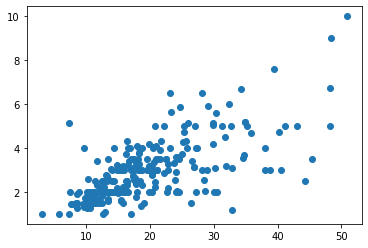

In [252]:
plt.plot(feature, target, 'o')

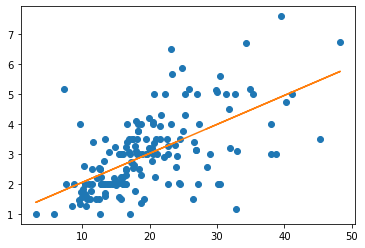

In [255]:
plt.plot(X_train, Y_train, 'o', label="ACTUAL")
plt.plot(X_train, pred, '-', label="PREDICTED")
plt.show()

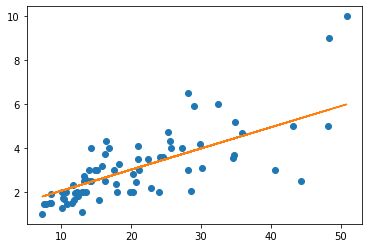

In [253]:
plt.plot(X_test, Y_test, 'o', label="ACTUAL")
plt.plot(X_test, pred, '-', label="PREDICTED")
plt.show()

In [256]:
covid = pd.read_csv("C:/batches/online_batch/batch1pm/Machine_Learning/covid_19_data.csv")

In [257]:
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [259]:
covid.shape

(205951, 8)

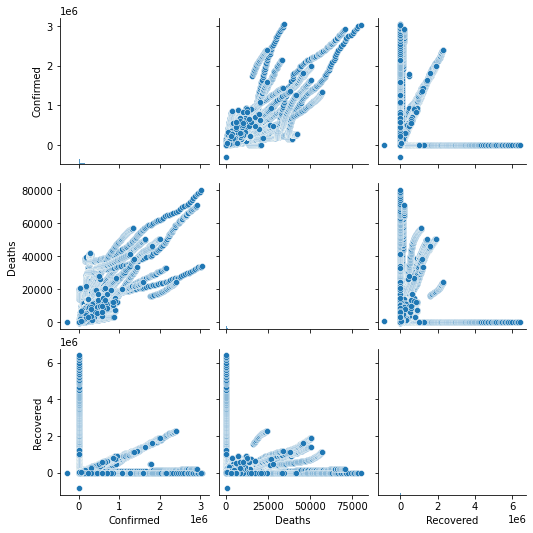

In [260]:
sns.pairplot(covid[['Confirmed', 'Deaths', 'Recovered']])

In [261]:
feature = covid['Confirmed']
target = covid['Deaths']

In [283]:
X_train, X_test, Y_train, Y_test = train_test_split_without_bias(feature, target)

mymodel = MyLinearRegression()
mymodel.fit(X_train, Y_train)
mypred = mymodel.predict(X_test)
acc1 = mymodel.r2_score(Y_test, mypred)
err1 = mymodel.mean_absolute_error(Y_test, mypred)

model = LinearRegression()
model.fit(X_train.reshape(-1, 1), Y_train) # learning
pred = model.predict(X_test.reshape(-1, 1))
acc2 = r2_score(Y_test, pred)
err2 = mean_absolute_error(Y_test, pred)


print("\n MYMODEL ACCURACY --> ", acc1)
print("\n MYMODEL ERROR --> ", err1)

print("\n INBUILT MODEL ACCURACY --> ", acc2)
print("\n INBUILT MODEL ERROR --> ", err2)


 MYMODEL ACCURACY -->  0.6989427584098875

 MYMODEL ERROR -->  754.9964139952143

 INBUILT MODEL ACCURACY -->  0.6989427584098413

 INBUILT MODEL ERROR -->  754.996413995157


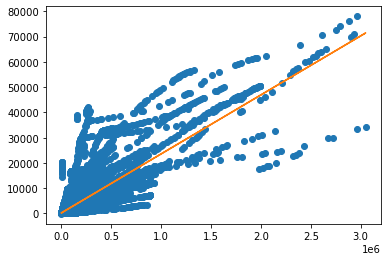

In [284]:
plt.plot(X_test, Y_test, 'o', label="ACTUAL")
plt.plot(X_test, pred, '-', label="PREDICTED")
plt.show()

In [264]:
feature.tail()

205946     62492.0
205947     13031.0
205948      1316.0
205949     42758.0
205950    224398.0
Name: Confirmed, dtype: float64

In [285]:

mymodel = MyLinearRegression()
mymodel.fit(X_train, Y_train)
mypred = mymodel.predict(X_train)
acc1 = mymodel.r2_score(Y_train, mypred)
err1 = mymodel.mean_absolute_error(Y_train, mypred)

model = LinearRegression()
model.fit(X_train.reshape(-1, 1), Y_train) # learning
pred = model.predict(X_train.reshape(-1, 1))
acc2 = r2_score(Y_train, pred)
err2 = mean_absolute_error(Y_train, pred)


print("\n MYMODEL ACCURACY --> ", acc1)
print("\n MYMODEL ERROR --> ", err1)

print("\n INBUILT MODEL ACCURACY --> ", acc2)
print("\n INBUILT MODEL ERROR --> ", err2)


 MYMODEL ACCURACY -->  0.6827874890402597

 MYMODEL ERROR -->  763.9787301519958

 INBUILT MODEL ACCURACY -->  0.6827874890402607

 INBUILT MODEL ERROR -->  763.9787301519414


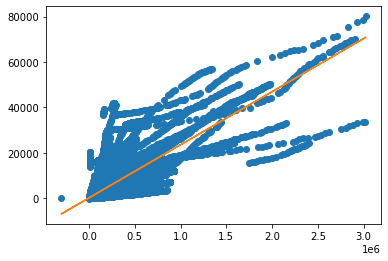

In [286]:
plt.plot(X_train, Y_train, 'o', label="ACTUAL")
plt.plot(X_train, pred, '-', label="PREDICTED")
plt.show()